<a href="https://colab.research.google.com/github/hpsuresh12345/Autoreview/blob/master/20Oct2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
df = pd.read_excel('Tweets_Infotainment_DashCam_15Oct2019.xlsx')
df.head()

,Tweets,Category
0,Our Top Pick of The Best Parking Mode Dash Cam...,Positive
1,Still watching #Russian #dashcam compilations ...,Neutral
2,Check out this great travel dash cam for your ...,Positive
3,Shortcut! #trafficcircle #dashcam https://t.co...,Neutral
4,Our DMS alarms include:\n①Closed Eyes\n②Yawnin...,Neutral


In [0]:
#Magic Command to print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [0]:
df.shape

(207, 2)

# Data preprocessing

In [0]:
#Check for NaN values in each column
df.isna().sum()

Tweets      0
Category    0
dtype: int64

In [0]:
#Percentage of NaN values
((len(df)-df.count())/len(df))*100

Tweets      0.0
Category    0.0
dtype: float64

Negative     21
Neutral      71
Positive    115
Name: Category, dtype: int64

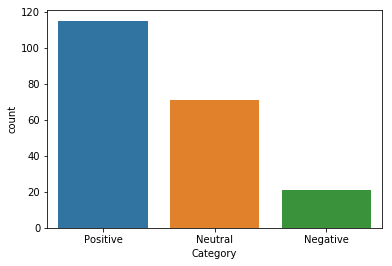

In [0]:
#Sentiment Count 
sentiment_count = df.Category.value_counts()
#Airline Review Count
Tweets_total = df['Tweets'].value_counts()

# examine the class distribution
df.Category.value_counts().sort_index()

sns.countplot(x = 'Category', data = df)

In [0]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


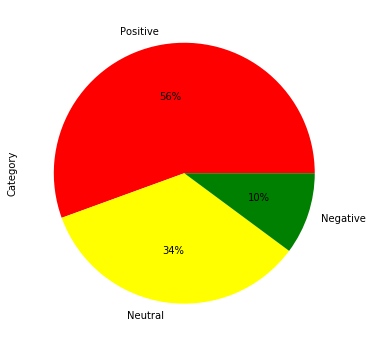

In [0]:
df.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

# Text preprocessing

In [0]:
def text_to_words(tweet):
    letters = re.sub("^a-zA-Z"," ",tweet)
    words = letters.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join(meaningful_words))

# Prediction models

In [0]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#Train-test split
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [0]:
counter_vectorizer = CountVectorizer(analyzer = "word")
train_features= counter_vectorizer.fit_transform(train_clean_text)
test_features=counter_vectorizer.transform(test_clean_text)

In [0]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.025, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.6190476190476191
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.62      0.76        42

    accuracy                           0.62        42
   macro avg       0.33      0.21      0.25        42
weighted avg       1.00      0.62      0.76        42



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<Figure size 576x432 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb08569cf8>)

([<matplotlib.axis.XTick at 0x7fcb085ad0b8>,
 <a list of 3 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7fcb0849d390>,
 <a list of 3 Text yticklabel objects>)

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

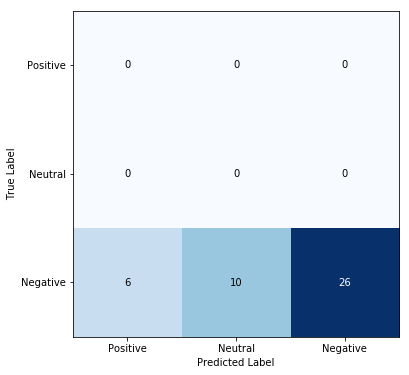

Accuracy of DecisionTreeClassifier is 0.6904761904761905
              precision    recall  f1-score   support

    Negative       0.17      1.00      0.29         1
     Neutral       0.80      0.47      0.59        17
    Positive       0.77      0.83      0.80        24

    accuracy                           0.69        42
   macro avg       0.58      0.77      0.56        42
weighted avg       0.77      0.69      0.70        42



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb0823aef0>)

([<matplotlib.axis.XTick at 0x7fcb0819aa58>,
 <a list of 3 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7fcb081a17b8>,
 <a list of 3 Text yticklabel objects>)

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

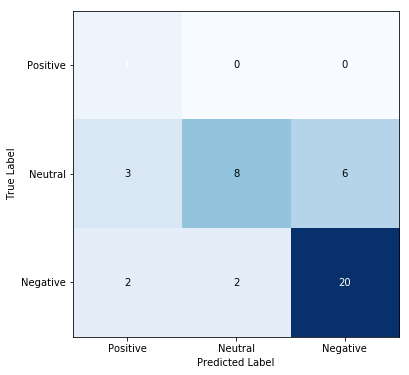

Accuracy of RandomForestClassifier is 0.5714285714285714
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.80      0.33      0.47        24
    Positive       0.62      0.89      0.73        18

    accuracy                           0.57        42
   macro avg       0.47      0.41      0.40        42
weighted avg       0.72      0.57      0.58        42



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<Figure size 576x432 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb080ea1d0>)

([<matplotlib.axis.XTick at 0x7fcb080fc9b0>,
 <a list of 3 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7fcb08101710>,
 <a list of 3 Text yticklabel objects>)

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

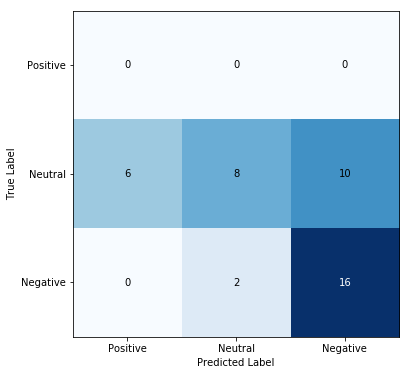

Accuracy of GradientBoostingClassifier is 0.7142857142857143
              precision    recall  f1-score   support

    Negative       0.33      0.67      0.44         3
     Neutral       0.90      0.47      0.62        19
    Positive       0.73      0.95      0.83        20

    accuracy                           0.71        42
   macro avg       0.65      0.70      0.63        42
weighted avg       0.78      0.71      0.71        42



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb080d8278>)

([<matplotlib.axis.XTick at 0x7fcb080e1a90>,
 <a list of 3 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7fcb080e77f0>,
 <a list of 3 Text yticklabel objects>)

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

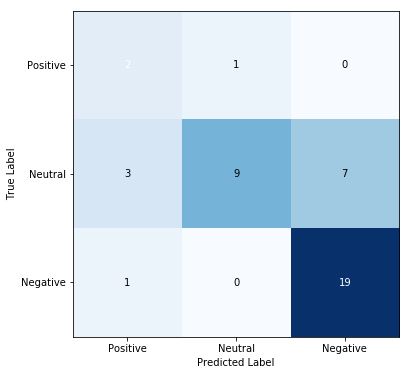

Accuracy of GaussianNB is 0.6190476190476191
              precision    recall  f1-score   support

    Negative       0.17      0.33      0.22         3
     Neutral       0.60      0.38      0.46        16
    Positive       0.73      0.83      0.78        23

    accuracy                           0.62        42
   macro avg       0.50      0.51      0.49        42
weighted avg       0.64      0.62      0.62        42



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb08154320>)

([<matplotlib.axis.XTick at 0x7fcb0802aac8>,
 <a list of 3 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7fcb08031828>,
 <a list of 3 Text yticklabel objects>)

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

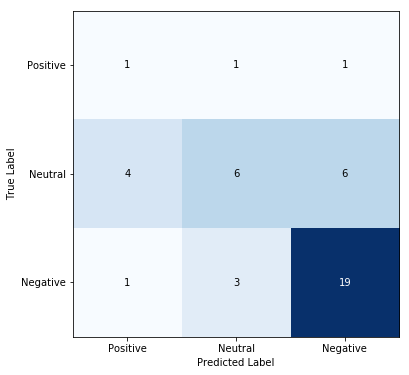

In [0]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Category'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Category'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Category'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Category']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Category'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(3), ['Positive','Neutral','Negative'],color='black')
    plt.yticks(range(3), ['Positive','Neutral','Negative'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()